In [1]:
from PIL import Image as img
import numpy as np
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('lena.bmp', cv2.IMREAD_GRAYSCALE)
lena_arr = np.asarray(image)

In [2]:
def expand(lena_arr):
    expanded_image = np.zeros((lena_arr.shape[0] + 2, lena_arr.shape[1] + 2), dtype=lena_arr.dtype)
    
    expanded_image[1:-1, 1:-1] = lena_arr
    expanded_image[0, 0] = lena_arr[0, 0]
    expanded_image[0, -1] = lena_arr[0, -1]
    expanded_image[-1, 0] = lena_arr[-1, 0]
    expanded_image[-1, -1] = lena_arr[-1, -1]
    
    expanded_image[0, 1:-1] = expanded_image[1, 1:-1]  # top border row
    expanded_image[-1, 1:-1] = expanded_image[-2, 1:-1]  # bottom border row
    expanded_image[1:-1, 0] = expanded_image[1:-1, 1]  # left border column
    expanded_image[1:-1, -1] = expanded_image[1:-1, -2]  # right border column
    
    return expanded_image

In [3]:
lena_arr = expand(lena_arr)

In [4]:
def zero_crossing_detector(arr,e):
    
    height, width = lena_arr.shape
    result = np.zeros_like(lena_arr) 
    
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            edge = 255
            if arr[i, j] == 1:
                for ki in range(-e // 2 + 1, e // 2 + 1):
                    for kj in range(-e // 2 + 1, e // 2 + 1):
                        if arr[i + ki, j + kj] == -1:
                            edge = 0
            result[i, j] = edge

    return result

In [5]:
def Laplacian(lena_arr, kernel, threshold):
    height, width = lena_arr.shape
    result = np.zeros_like(lena_arr)
    

    for i in range(1, height - 1):
        for j in range(1, width - 1):
            sub_region = lena_arr[i-1:i+2, j-1:j+2]
            temp = np.sum(sub_region * kernel) / (kernel[0][0]*2 + kernel[0][1])
#             print(sub_region * kernel)
            if temp >= threshold:
                result[i][j] = 1
            elif temp <= -threshold:
                result[i][j] = -1
            else:
                result[i][j] = 0
                
    return result

In [6]:
kernel = np.array([ [0, 1, 0],
                    [1, -4, 1],
                    [0, 1, 0],
        ])

In [7]:
t=Laplacian(np.array(lena_arr,dtype='int'),kernel ,15)
a=zero_crossing_detector(t, 3)
a = a[1:-1, 1:-1]
cv2.imwrite('a.png', np.array(a, dtype='uint8'))

True

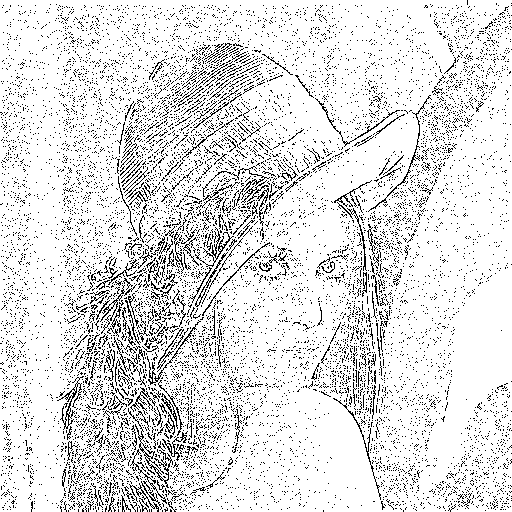

In [8]:
img.fromarray(np.array(a,dtype='uint8'))

In [9]:
kernel = np.array([ [1, 1, 1],
                    [1, -8, 1],
                    [1, 1, 1],
        ])

In [10]:
t=Laplacian(np.array(lena_arr,dtype='int'),kernel ,15)
b=zero_crossing_detector(t, 3)
b = b[1:-1, 1:-1]
cv2.imwrite('b.png', np.array(b, dtype='uint8'))

True

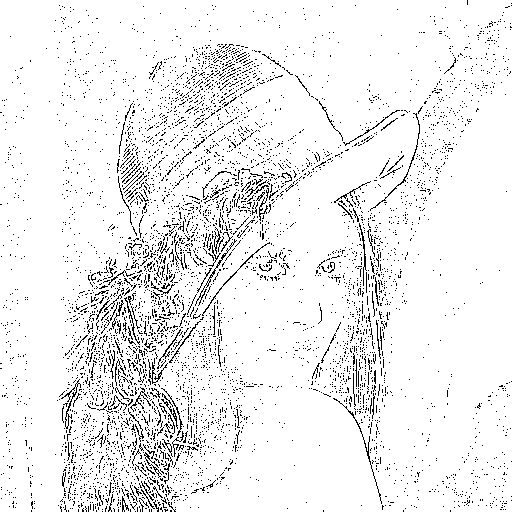

In [11]:
img.fromarray(np.array(b,dtype='uint8'))

In [12]:
kernel = np.array([ [2, -1, 2],
                    [-1, -4, -1],
                    [2, -1, 2],
        ])

In [13]:
t=Laplacian(np.array(lena_arr,dtype='int'),kernel ,11)
c=zero_crossing_detector(t, 3)
c = c[1:-1, 1:-1]
cv2.imwrite('c.png', np.array(c, dtype='uint8'))

True

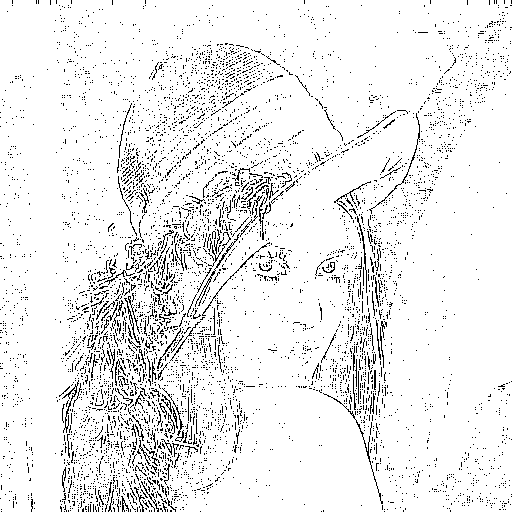

In [14]:
img.fromarray(np.array(c,dtype='uint8'))

In [15]:
def Gaussion(lena_arr, kernel, threshold):
    height, width = lena_arr.shape
    result = np.zeros_like(lena_arr)
    for i in range(5, height - 5):
        for j in range(5, width - 5):
            sub_region = lena_arr[i-5:i+6, j-5:j+6]
            temp = np.sum(sub_region * kernel) 
#             print(sub_region * kernel)
            if temp >= threshold:
                result[i][j] = 1
            elif temp <= -threshold:
                result[i][j] = -1
            else:
                result[i][j] = 0
                
    return result

In [16]:
for i in range(4):
    lena_arr = expand(lena_arr)

In [17]:
kernel = np.array([
            [0, 0, 0, -1, -1, -2, -1, -1, 0, 0, 0],
            [0, 0, -2, -4, -8, -9, -8, -4, -2, 0, 0],
            [0, -2, -7, -15, -22, -23, -22, -15, -7, -2, 0],
            [-1, -4, -15, -24, -14, -1, -14, -24, -15, -4, -1],
            [-1, -8, -22, -14, 52, 103, 52, -14, -22, -8, -1],
            [-2, -9, -23, -1, 103, 178, 103, -1, -23, -9, -2],
            [-1, -8, -22, -14, 52, 103, 52, -14, -22, -8, -1],
            [-1, -4, -15, -24, -14, -1, -14, -24, -15, -4, -1],
            [0, -2, -7, -15, -22, -23, -22, -15, -7, -2, 0],
            [0, 0, -2, -4, -8, -9, -8, -4, -2, 0, 0],
            [0, 0, 0, -1, -1, -2, -1, -1, 0, 0, 0]
        ])

In [18]:
t=Gaussion(np.array(lena_arr,dtype='int'),kernel ,2000)
d=zero_crossing_detector(t, 3)
d = d[1:-1, 1:-1]
cv2.imwrite('d.png', np.array(d, dtype='uint8'))

True

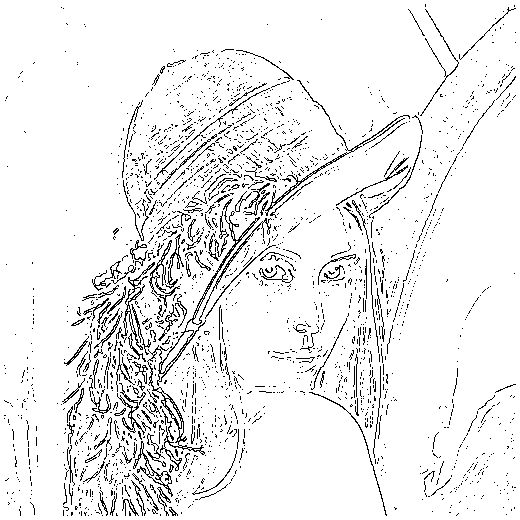

In [19]:
img.fromarray(np.array(d,dtype='uint8'))

In [20]:
kernel = np.array([
            [-1, -3, -4, -6, -7, -8, -7, -6, -4, -3, -1],
            [-3, -5, -8, -11, -13, -13, -13, -11, -8, -5, -3],
            [-4, -8, -12, -16, -17, -17, -17, -16, -12, -8, -4],
            [-6, -11, -16, -16, 0, 15, 0, -16, -16, -11, -6],
            [-7, -13, -17, 0, 85, 160, 85, 0, -17, -13, -7],
            [-8, -13, -17, 15, 160, 283, 160, 15, -17, -13, -8],
            [-7, -13, -17, 0, 85, 160, 85, 0, -17, -13, -7],
            [-6, -11, -16, -16, 0, 15, 0, -16, -16, -11, -6],
            [-4, -8, -12, -16, -17, -17, -17, -16, -12, -8, -4],
            [-3, -5, -8, -11, -13, -13, -13, -11, -8, -5, -3],
            [-1, -3, -4, -6, -7, -8, -7, -6, -4, -3, -1],
        ])

In [21]:
t=Gaussion(np.array(lena_arr,dtype='int'),kernel ,1)
e=zero_crossing_detector(t, 3)
e = e[1:-1, 1:-1]
cv2.imwrite('e.png', np.array(e, dtype='uint8'))

True

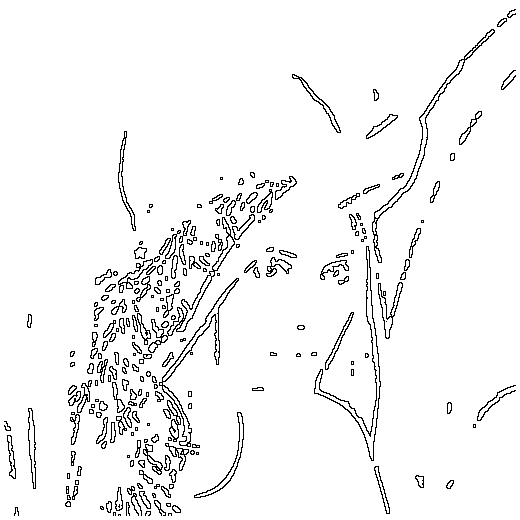

In [22]:
img.fromarray(np.array(e,dtype='uint8'))